In [5]:
import pathlib

import skimage

# import tangram for spatial deconvolution
import tangram as tg

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import scanpy as sc
import squidpy as sq
from anndata import AnnData

In [9]:
sclcVisium = sq.read.visium('',counts_file='sclcVisiumFiltered.h5')
sclcVisium

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3858 × 18085
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [8]:
sclcSC = sc.read_h5ad('../data/sclcCells.h5ad')
sclcSC

AnnData object with n_obs × n_vars = 20631 × 56295
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subject_type', 'tissue_coarse_unharmonized', 't

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

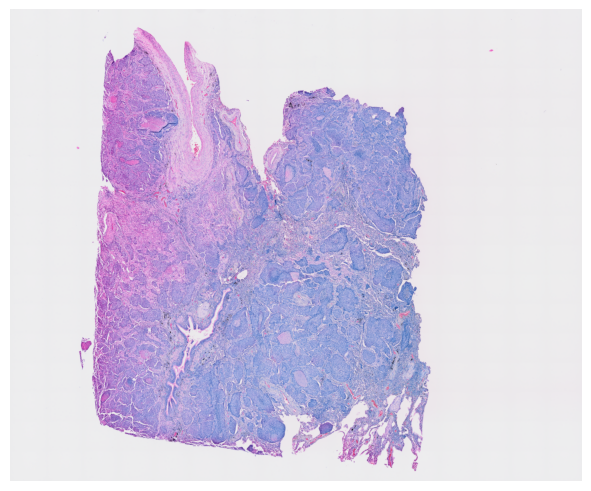

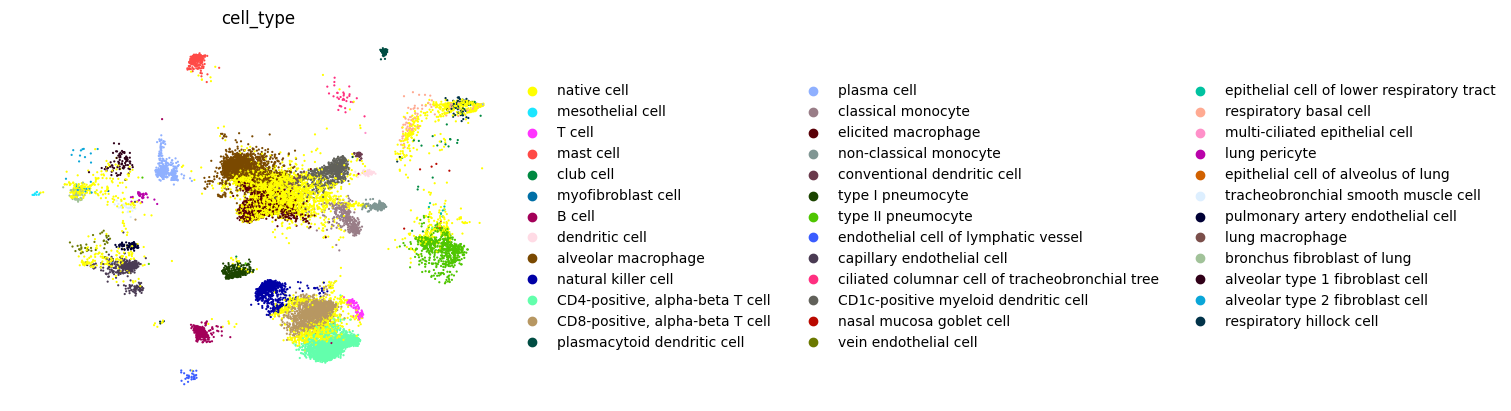

In [21]:
sq.pl.spatial_scatter(sclcVisium, alpha=0.7, frameon=False)
sc.pl.umap(sclcSC, color="cell_type", size=10, frameon=False, show=False)

In [22]:
sq.im.process(img='spatial/tissue_hires_image.png', layer="image", method="smooth")
sq.im.segment(
    img='spatial/tissue_hires_image.png',
    layer="image_smooth",
    method="watershed",
    channel=0,
)

AttributeError: 'str' object has no attribute '_get_layer'

In [24]:
img = sq.datasets.visium_fluo_image_crop()

  0%|          | 0.00/303M [00:00<?, ?B/s]

/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


In [26]:
print(img)

ImageContainer[shape=(7272, 7272), layers=['image']]


/Users/shivaramakrishna/Library/Python/3.9/lib/python/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
